In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n, inverse=False):
    """Executes QFT or inverse QFT circuit and displays Bloch sphere representation."""
    if inverse:
        qc = inverse_qft_circuit(n)
    else:
        qc = qft_circuit(n)


    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


### Task 1

In [7]:
for n in [2, 3, 4]:
    print(f"\nRunning Quantum Fourier Transform on {n} qubits...")
    run_qft(n)


Running Quantum Fourier Transform on 2 qubits...
                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

Running Quantum Fourier Transform on 4 qubits...
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                       

### Task 2

In [8]:
def inverse_qft_rotations(qc, n):
    """Apply inverse QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    for qubit in reversed(range(n)):
        qc.cp(-np.pi / 2**(n - qubit), qubit, n)
    qc.h(n)
    inverse_qft_rotations(qc, n)
    return qc

In [9]:
def inverse_qft_circuit(n):
    """Builds an n-qubit Inverse Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    swap_registers(qc, n)
    inverse_qft_rotations(qc, n)
    qc.name = "Inverse QFT"
    return qc

### Task 3

In [12]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a810b1e98c95133dbbc7607694cb0ebf2400a79cf214df78a7b578b14fc7587f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Number of counting qubits
t = 3
# Number of eigenvalue qubits
n = 1

# Create a quantum circuit with t counting qubits and n eigenvalue qubits
qc_pe = QuantumCircuit(t + n, t)

In [13]:
# Apply Hadamard gates to the counting qubits
qc_pe.h(range(t))
qc_pe.barrier() # Add a barrier for better visualization
display(qc_pe.draw(output='mpl'))

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

### Task 4


Total counts for measurement: {'000': 1024}


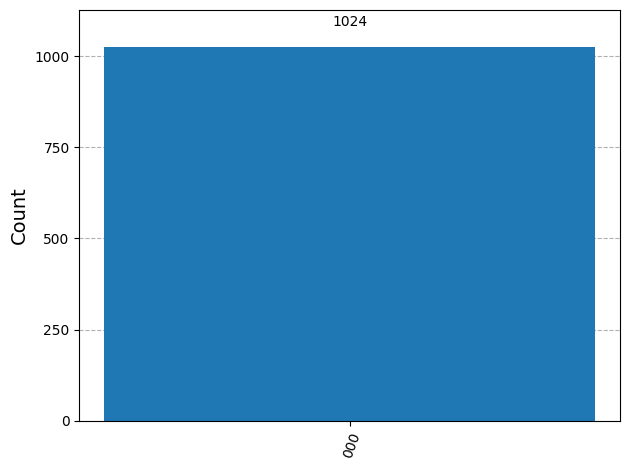

In [14]:
# Add measurements to the counting qubits
qc_pe.measure(range(t), range(t))

# Create a simulator
simulator = AerSimulator()

# Transpile and run the circuit
compiled_circuit = transpile(qc_pe, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the counts
counts = result.get_counts(qc_pe)
print("\nTotal counts for measurement:", counts)

# You can also plot the histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Task 5

In [15]:
display(qc_pe.draw(output='mpl'))

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."